In [1]:
import pandas as pd
import numpy as np
import torch
import os
import sys
import matplotlib.pyplot as plt

sys.path.append('..')
from src.models.model import VSpyct
from src.utils import (calculate_bs, fix_predictions, plot_brier)
from src.data.dataset import SurvivalDataset
from src.eval import IPCWBrier

/Users/viktorandonovic/miniconda3/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = SurvivalDataset(fname='pbc.rda', path='../data/raw/')
print(data.dataset.head())
X_train, X_test, y_train, y_test = data.get_tensors()

   id  time  status trt        age sex ascites hepato spiders  edema  bili  \
0   1   400       2   1  58.765229   f       1      1       1    1.0  14.5   
1   2  4500       0   1  56.446270   f       0      1       1    0.0   1.1   
2   3  1012       2   1  70.072553   m       0      0       0    0.5   1.4   
3   4  1925       2   1  54.740589   f       0      1       1    0.5   1.8   
4   5  1504       1   2  38.105407   f       0      1       1    0.0   3.4   

  chol  albumin copper  alk.phos     ast trig platelet  protime stage  
0  261     2.60    156    1718.0  137.95  172      190     12.2     4  
1  302     4.14     54    7394.8  113.52   88      221     10.6     3  
2  176     3.48    210     516.0   96.10   55      151     12.0     4  
3  244     2.54     64    6121.8   60.63   92      183     10.3     4  
4  279     3.53    143     671.0  113.15   72      136     10.9     3  
4795
Succesfully created time tensor of shape: torch.Size([418, 4795])
(334, 769) torch.Size([334, 

In [3]:
model = VSpyct(max_depth=3, bs=64)
model.fit(X_train, y_train)

Total variance: 569.7177124023438
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)


Epochs:   1%|          | 3/500 [00:00<01:02,  7.97it/s]

[iteration 0001] loss: 519139990732.8000
[iteration 0002] loss: 470864558080.0001
[iteration 0003] loss: 429126990848.0000


Epochs:   1%|          | 5/500 [00:00<00:49,  9.94it/s]

[iteration 0004] loss: 406300953395.2000
[iteration 0005] loss: 360483797401.6000
[iteration 0006] loss: 327272720691.2000


Epochs:   2%|▏         | 9/500 [00:00<00:42, 11.66it/s]

[iteration 0007] loss: 306169552896.0000
[iteration 0008] loss: 279117252608.0000
[iteration 0009] loss: 253113375744.0000


Epochs:   2%|▏         | 11/500 [00:01<00:40, 12.13it/s]

[iteration 0010] loss: 231641464934.4000
[iteration 0011] loss: 217123674368.0000
[iteration 0012] loss: 198135046348.8000


Epochs:   3%|▎         | 15/500 [00:01<00:38, 12.63it/s]

[iteration 0013] loss: 181762916121.6000
[iteration 0014] loss: 172563621376.0000
[iteration 0015] loss: 156151162649.6000


Epochs:   3%|▎         | 17/500 [00:01<00:37, 12.85it/s]

[iteration 0016] loss: 151345581337.6000
[iteration 0017] loss: 141053916377.6000
[iteration 0018] loss: 123372007772.8000


Epochs:   4%|▍         | 21/500 [00:01<00:36, 13.04it/s]

[iteration 0019] loss: 117175310307.2000
[iteration 0020] loss: 108863575516.8000
[iteration 0021] loss: 103524601668.8000


Epochs:   5%|▍         | 23/500 [00:01<00:36, 13.07it/s]

[iteration 0022] loss: 96647295149.4000
[iteration 0023] loss: 86593731854.7832
[iteration 0024] loss: 85177655637.0000


Epochs:   5%|▌         | 27/500 [00:02<00:35, 13.17it/s]

[iteration 0025] loss: 80188693221.3844
[iteration 0026] loss: 75407835808.5299
[iteration 0027] loss: 76135395826.3000


Epochs:   6%|▌         | 29/500 [00:02<00:35, 13.22it/s]

[iteration 0028] loss: 72212379858.4750
[iteration 0029] loss: 69151983638.0000
[iteration 0030] loss: 65566901235.3000


Epochs:   7%|▋         | 33/500 [00:02<00:36, 12.77it/s]

[iteration 0031] loss: 64382398385.0000
[iteration 0032] loss: 62068733960.4750
[iteration 0033] loss: 60975269827.7000


Epochs:   7%|▋         | 35/500 [00:02<00:36, 12.85it/s]

[iteration 0034] loss: 58296118026.2312
[iteration 0035] loss: 53092452438.9023
[iteration 0036] loss: 53920808044.4000


Epochs:   7%|▋         | 37/500 [00:03<00:39, 11.87it/s]


[iteration 0037] loss: 54510776742.5750
Early stopping at epoch 37.
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)
Var left tensor(732.4625)
Var right tensor(553.3262)
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)


Epochs:   0%|          | 0/500 [00:00<?, ?it/s]

[iteration 0001] loss: 218485971660.8000


Epochs:   0%|          | 2/500 [00:00<00:35, 13.89it/s]

[iteration 0002] loss: 206209924403.2000
[iteration 0003] loss: 190746063052.8000


Epochs:   1%|          | 4/500 [00:00<00:33, 14.71it/s]

[iteration 0004] loss: 170783813222.4000
[iteration 0005] loss: 155038354457.6000


Epochs:   1%|          | 6/500 [00:00<00:32, 14.98it/s]

[iteration 0006] loss: 142620873958.4000
[iteration 0007] loss: 128767466854.4000


Epochs:   2%|▏         | 8/500 [00:00<00:32, 15.19it/s]

[iteration 0008] loss: 119085384396.8000
[iteration 0009] loss: 106777183955.2000


Epochs:   2%|▏         | 10/500 [00:00<00:32, 15.31it/s]

[iteration 0010] loss: 97350286790.4000
[iteration 0011] loss: 88139471046.4000


Epochs:   2%|▏         | 12/500 [00:00<00:32, 15.18it/s]

[iteration 0012] loss: 81909383467.2000


Epochs:   3%|▎         | 14/500 [00:00<00:32, 15.14it/s]

[iteration 0013] loss: 77086165722.9324
[iteration 0014] loss: 71184782315.2969
[iteration 0015] loss: 67874343897.2000


Epochs:   3%|▎         | 16/500 [00:01<00:31, 15.35it/s]

[iteration 0016] loss: 61713910470.2250


Epochs:   4%|▎         | 18/500 [00:01<00:30, 15.59it/s]

[iteration 0017] loss: 57550622227.4875
[iteration 0018] loss: 55250873138.5875
[iteration 0019] loss: 50819009613.5500


Epochs:   4%|▍         | 20/500 [00:01<00:30, 15.69it/s]

[iteration 0020] loss: 50133652321.4000


Epochs:   4%|▍         | 22/500 [00:01<00:30, 15.69it/s]

[iteration 0021] loss: 46568431304.8000
[iteration 0022] loss: 46372237862.0000
[iteration 0023] loss: 43374475301.7000


Epochs:   5%|▍         | 24/500 [00:01<00:30, 15.77it/s]

[iteration 0024] loss: 42593010228.8000


Epochs:   5%|▌         | 26/500 [00:01<00:29, 15.81it/s]

[iteration 0025] loss: 42601572701.6250
[iteration 0026] loss: 39802943293.6000
[iteration 0027] loss: 39557774786.0000


Epochs:   6%|▌         | 28/500 [00:01<00:29, 15.88it/s]

[iteration 0028] loss: 39931159014.4000


Epochs:   6%|▌         | 30/500 [00:01<00:29, 15.87it/s]

[iteration 0029] loss: 37669176864.6813
[iteration 0030] loss: 37980234323.1625
[iteration 0031] loss: 38514853695.1562


Epochs:   6%|▋         | 32/500 [00:02<00:29, 15.88it/s]

[iteration 0032] loss: 36356262548.4500


Epochs:   7%|▋         | 34/500 [00:02<00:29, 15.86it/s]

[iteration 0033] loss: 36304885280.1750
[iteration 0034] loss: 36605282146.5097
[iteration 0035] loss: 36238035621.2000


Epochs:   7%|▋         | 36/500 [00:02<00:29, 15.88it/s]

[iteration 0036] loss: 36489574582.1000


Epochs:   8%|▊         | 38/500 [00:02<00:29, 15.92it/s]

[iteration 0037] loss: 36553037065.8250
[iteration 0038] loss: 34814467323.3821
[iteration 0039] loss: 33580430619.0084


Epochs:   8%|▊         | 40/500 [00:02<00:28, 15.91it/s]

[iteration 0040] loss: 34715209074.7500


Epochs:   8%|▊         | 42/500 [00:02<00:28, 15.89it/s]

[iteration 0041] loss: 33376000524.5422
[iteration 0042] loss: 36616147401.5406
[iteration 0043] loss: 35352141789.0820


Epochs:   9%|▊         | 43/500 [00:02<00:29, 15.27it/s]

Early stopping at epoch 43.
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)


Var left tensor(557.9114)
Var right tensor(536.3712)
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)


Epochs:   1%|▏         | 7/500 [00:00<00:07, 67.88it/s]


[iteration 0001] loss: 79152852992.0000
[iteration 0002] loss: 76438525542.4000
[iteration 0003] loss: 75529236889.6000
[iteration 0004] loss: 74975432704.0000
[iteration 0005] loss: 71528229273.6000
[iteration 0006] loss: 72621229260.8000
[iteration 0007] loss: 73989329715.2000
Early stopping at epoch 7.
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)
Var left tensor(486.8515)
Var right tensor(606.8333)
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)


Epochs:   0%|          | 0/500 [00:00<?, ?it/s]

[iteration 0001] loss: 257829667430.4000


Epochs:   1%|          | 4/500 [00:00<00:25, 19.22it/s]

[iteration 0002] loss: 240131337830.4000
[iteration 0003] loss: 232154893926.4000
[iteration 0004] loss: 212206436659.2000
[iteration 0005] loss: 198144942080.0000


Epochs:   2%|▏         | 8/500 [00:00<00:25, 19.59it/s]

[iteration 0006] loss: 190649119436.8000
[iteration 0007] loss: 175696317747.2000
[iteration 0008] loss: 162884603904.0000
[iteration 0009] loss: 153636527206.4000


Epochs:   2%|▏         | 12/500 [00:00<00:24, 19.68it/s]

[iteration 0010] loss: 147158916684.8000
[iteration 0011] loss: 137668778342.4000
[iteration 0012] loss: 132821351014.4000
[iteration 0013] loss: 122544685619.2000


Epochs:   3%|▎         | 16/500 [00:00<00:24, 19.77it/s]

[iteration 0014] loss: 116222557139.2000
[iteration 0015] loss: 109039733401.6000
[iteration 0016] loss: 104597283033.6000
[iteration 0017] loss: 97404790577.6000


Epochs:   4%|▎         | 18/500 [00:00<00:24, 19.81it/s]

[iteration 0018] loss: 91547973180.3062


Epochs:   4%|▍         | 20/500 [00:01<00:24, 19.82it/s]

[iteration 0019] loss: 90260500646.8000
[iteration 0020] loss: 87923604922.9875
[iteration 0021] loss: 82812326519.5750


Epochs:   4%|▍         | 22/500 [00:01<00:24, 19.81it/s]

[iteration 0022] loss: 81916488764.2000
[iteration 0023] loss: 79329335099.0867


Epochs:   5%|▍         | 24/500 [00:01<00:24, 19.64it/s]

[iteration 0024] loss: 73237123795.3351
[iteration 0025] loss: 71120411912.4875


Epochs:   5%|▌         | 26/500 [00:01<00:24, 19.62it/s]

[iteration 0026] loss: 66987841240.0500
[iteration 0027] loss: 63958074263.6000


Epochs:   6%|▌         | 29/500 [00:01<00:23, 19.76it/s]

[iteration 0028] loss: 64037123520.0000
[iteration 0029] loss: 63095168066.2000


Epochs:   6%|▌         | 31/500 [00:01<00:24, 19.53it/s]

[iteration 0030] loss: 60959024728.8000
[iteration 0031] loss: 59585788988.8000


Epochs:   7%|▋         | 33/500 [00:01<00:24, 19.44it/s]

[iteration 0032] loss: 57220439385.5500
[iteration 0033] loss: 57745242925.6000


Epochs:   7%|▋         | 35/500 [00:01<00:24, 19.37it/s]

[iteration 0034] loss: 56450498543.2000
[iteration 0035] loss: 55993529712.6250


Epochs:   7%|▋         | 37/500 [00:01<00:23, 19.30it/s]

[iteration 0036] loss: 53226411894.8812
[iteration 0037] loss: 54000398160.8000


Epochs:   8%|▊         | 39/500 [00:01<00:24, 19.19it/s]

[iteration 0038] loss: 53517500154.0000
[iteration 0039] loss: 52610145740.4730


Epochs:   8%|▊         | 41/500 [00:02<00:23, 19.18it/s]

[iteration 0040] loss: 51920785623.8830
[iteration 0041] loss: 51402786553.3906


Epochs:   9%|▊         | 43/500 [00:02<00:23, 19.16it/s]

[iteration 0042] loss: 50833325604.5999
[iteration 0043] loss: 50380260091.1375


Epochs:   9%|▉         | 45/500 [00:02<00:23, 19.10it/s]

[iteration 0044] loss: 49907801153.4437
[iteration 0045] loss: 49766294357.4875


Epochs:   9%|▉         | 47/500 [00:02<00:23, 19.11it/s]

[iteration 0046] loss: 47833093187.1000
[iteration 0047] loss: 49125235248.4500


Epochs:  10%|▉         | 48/500 [00:02<00:23, 19.04it/s]


[iteration 0048] loss: 49945076296.0000
Early stopping at epoch 48.
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)
Var left tensor(539.0010)
Var right tensor(563.3669)
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)


Epochs:   1%|          | 5/500 [00:00<00:11, 42.97it/s]

[iteration 0001] loss: 328797996646.4000
[iteration 0002] loss: 315806041292.8000
[iteration 0003] loss: 313698040217.6000
[iteration 0004] loss: 313813691187.2000
[iteration 0005] loss: 305050871808.0000
[iteration 0006] loss: 298047433113.6000
[iteration 0007] loss: 293673755443.2000
[iteration 0008] loss: 293109219737.6000
[iteration 0009] loss: 291409616486.4000


Epochs:   2%|▏         | 10/500 [00:00<00:11, 43.49it/s]

[iteration 0010] loss: 278700831539.2001
[iteration 0011] loss: 275401124249.6000
[iteration 0012] loss: 269229650739.2000
[iteration 0013] loss: 262245689753.6000
[iteration 0014] loss: 272197191680.0000


Epochs:   3%|▎         | 15/500 [00:00<00:11, 43.87it/s]

[iteration 0015] loss: 254180810342.4000
[iteration 0016] loss: 253271782195.2000
[iteration 0017] loss: 254828828262.4001
[iteration 0018] loss: 254983297433.6000


Epochs:   4%|▍         | 20/500 [00:00<00:10, 43.75it/s]

[iteration 0019] loss: 244438814720.0000
[iteration 0020] loss: 245249676902.4000
[iteration 0021] loss: 239440783769.6000
[iteration 0022] loss: 233260994150.4000
[iteration 0023] loss: 227562161356.8000


Epochs:   5%|▌         | 25/500 [00:00<00:10, 43.54it/s]

[iteration 0024] loss: 230366502092.8000
[iteration 0025] loss: 219876506419.2000
[iteration 0026] loss: 221216494387.2000
[iteration 0027] loss: 214736632217.6000


Epochs:   6%|▌         | 30/500 [00:00<00:10, 43.23it/s]

[iteration 0028] loss: 211973322342.4000
[iteration 0029] loss: 213785517670.4000
[iteration 0030] loss: 210185714483.2000
[iteration 0031] loss: 206254075904.0000
[iteration 0032] loss: 202281275392.0000


Epochs:   7%|▋         | 35/500 [00:00<00:10, 43.15it/s]

[iteration 0033] loss: 202639720857.6000
[iteration 0034] loss: 194414526873.6000
[iteration 0035] loss: 187913762816.0000
[iteration 0036] loss: 188428587417.6000


Epochs:   8%|▊         | 40/500 [00:00<00:10, 42.90it/s]

[iteration 0037] loss: 187173163417.6000
[iteration 0038] loss: 185152876544.0000
[iteration 0039] loss: 178068880998.4000
[iteration 0040] loss: 179139113779.2000
[iteration 0041] loss: 174442501324.8000


Epochs:   9%|▉         | 45/500 [00:01<00:10, 42.92it/s]

[iteration 0042] loss: 170441138995.2000
[iteration 0043] loss: 168940156518.4000
[iteration 0044] loss: 172213177548.8000
[iteration 0045] loss: 168444855091.2000


Epochs:  10%|█         | 50/500 [00:01<00:10, 43.09it/s]

[iteration 0046] loss: 166563792896.0000
[iteration 0047] loss: 162864763699.2000
[iteration 0048] loss: 157778641715.2000
[iteration 0049] loss: 154409713664.0000
[iteration 0050] loss: 156428803686.4000
[iteration 0051] loss: 155484417638.4000
[iteration 0052] loss: 147937874739.2000
[iteration 0053] loss: 146278866534.4000
[iteration 0054] loss: 148382746624.0000


Epochs:  11%|█         | 55/500 [00:01<00:10, 43.21it/s]

[iteration 0055] loss: 144395578777.6000
[iteration 0056] loss: 140377539788.8000
[iteration 0057] loss: 135175286169.6000
[iteration 0058] loss: 136735503974.4000
[iteration 0059] loss: 133411060121.6000


Epochs:  12%|█▏        | 60/500 [00:01<00:10, 43.52it/s]

[iteration 0060] loss: 135929400524.8000
[iteration 0061] loss: 134620405760.0000
[iteration 0062] loss: 128146508800.0000
[iteration 0063] loss: 127420840755.2000


Epochs:  13%|█▎        | 65/500 [00:01<00:09, 43.59it/s]

[iteration 0064] loss: 122961000038.4000
[iteration 0065] loss: 123067565465.6000
[iteration 0066] loss: 122080420864.0000
[iteration 0067] loss: 118234637926.4000
[iteration 0068] loss: 120651859763.2000


Epochs:  14%|█▍        | 70/500 [00:01<00:10, 42.43it/s]

[iteration 0069] loss: 114275442278.4000
[iteration 0070] loss: 117584316825.6000
[iteration 0071] loss: 114215104307.2000
[iteration 0072] loss: 112302649548.8000


Epochs:  15%|█▌        | 75/500 [00:01<00:10, 42.34it/s]

[iteration 0073] loss: 111004444262.4000
[iteration 0074] loss: 114910386585.6000
[iteration 0075] loss: 108996716134.4000
[iteration 0076] loss: 111892238131.2000
[iteration 0077] loss: 104357146009.6000


Epochs:  16%|█▌        | 80/500 [00:01<00:09, 42.51it/s]

[iteration 0078] loss: 99537580851.2000
[iteration 0079] loss: 102819890585.6000
[iteration 0080] loss: 100517884313.6000
Early stopping at epoch 80.
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)
Var left tensor(651.2500)
Var right tensor(712.1355)


Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)


Epochs:   2%|▏         | 8/500 [00:00<00:06, 76.63it/s]

[iteration 0001] loss: 281709723648.0000
[iteration 0002] loss: 274342345113.6000
[iteration 0003] loss: 273889601126.4000
[iteration 0004] loss: 272168647065.6000
[iteration 0005] loss: 267274071244.8000
[iteration 0006] loss: 260481944780.8000
[iteration 0007] loss: 261722085785.6000
[iteration 0008] loss: 269304574771.2000
[iteration 0009] loss: 255101213081.6000
[iteration 0010] loss: 258711530700.8000
[iteration 0011] loss: 254838240051.2000
[iteration 0012] loss: 252655270297.6000
[iteration 0013] loss: 246506243686.4000
[iteration 0014] loss: 249614945484.8000
[iteration 0015] loss: 249068924108.8000


Epochs:   3%|▎         | 16/500 [00:00<00:06, 77.87it/s]

[iteration 0016] loss: 241863260569.6000


Epochs:   5%|▍         | 24/500 [00:00<00:06, 77.30it/s]

[iteration 0017] loss: 237429438873.6000
[iteration 0018] loss: 236826759987.2000
[iteration 0019] loss: 236202101964.8000
[iteration 0020] loss: 232151855923.2000
[iteration 0021] loss: 233150493491.2000
[iteration 0022] loss: 229902090240.0000
[iteration 0023] loss: 225913330073.6000
[iteration 0024] loss: 230831751168.0000
[iteration 0025] loss: 229810893619.2000
[iteration 0026] loss: 220939957043.2000
[iteration 0027] loss: 221170129305.6000
[iteration 0028] loss: 225483412275.2000
[iteration 0029] loss: 214128055091.2000
[iteration 0030] loss: 216271354265.6000
[iteration 0031] loss: 212666630144.0000


Epochs:   6%|▋         | 32/500 [00:00<00:06, 77.66it/s]

[iteration 0032] loss: 212063245107.2000


Epochs:   8%|▊         | 40/500 [00:00<00:05, 77.36it/s]

[iteration 0033] loss: 207516286976.0000
[iteration 0034] loss: 209585037312.0000
[iteration 0035] loss: 207277100236.8000
[iteration 0036] loss: 202441290547.2000
[iteration 0037] loss: 200094141644.8000
[iteration 0038] loss: 202240424345.6000
[iteration 0039] loss: 197841729945.6000
[iteration 0040] loss: 200830423859.2000
[iteration 0041] loss: 195655217971.2000
[iteration 0042] loss: 199381227929.6000
[iteration 0043] loss: 198560033996.8000
[iteration 0044] loss: 191790519091.2000
[iteration 0045] loss: 189167948595.2000
[iteration 0046] loss: 191203916185.6000
[iteration 0047] loss: 187535463219.2000


Epochs:  10%|▉         | 48/500 [00:00<00:05, 78.03it/s]

[iteration 0048] loss: 186335477760.0000


Epochs:  11%|█         | 53/500 [00:00<00:05, 76.00it/s]


[iteration 0049] loss: 178687500288.0000
[iteration 0050] loss: 188117590016.0000
[iteration 0051] loss: 175630601420.8000
[iteration 0052] loss: 178946179072.0000
[iteration 0053] loss: 177611661312.0000
Early stopping at epoch 53.
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)
Var left tensor(604.4279)
Var right tensor(894.8420)
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)


Epochs:   0%|          | 0/500 [00:00<?, ?it/s]

[iteration 0001] loss: 142409628876.8000


Epochs:   1%|          | 4/500 [00:00<00:07, 62.25it/s]

[iteration 0002] loss: 138599210188.8000
[iteration 0003] loss: 139968668467.2000
[iteration 0004] loss: 139761333043.2000
Early stopping at epoch 4.
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)
Var left tensor(nan)
Var right tensor(842.6666)


In [4]:
preds = model.predict(X_test)
avg_preds = preds.mean(axis=1)

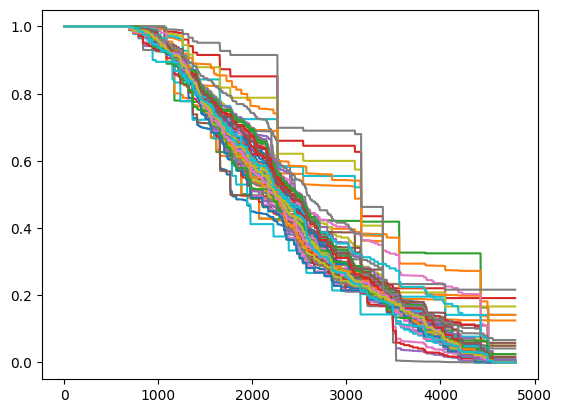

In [5]:
for i in range(80):
  plt.plot(avg_preds[i])

In [6]:
pstore = model.root_node.param_store.detach()

In [7]:
X_train, T_train, E_train, X_test, T_test, E_test = data.pysurvival_split()

In [8]:
import spyct

model = spyct.Model()
model.fit(X_train.values, y_train.numpy())

In [9]:
preds_spyct = model.predict(y_test.numpy())

In [10]:
roots_list = [tree[0].split_weights.to_ndarray()[0] for tree in model.trees]
roots_list = np.array(roots_list)
# [node.split_weights.to_ndarray() for node in nodes_list]

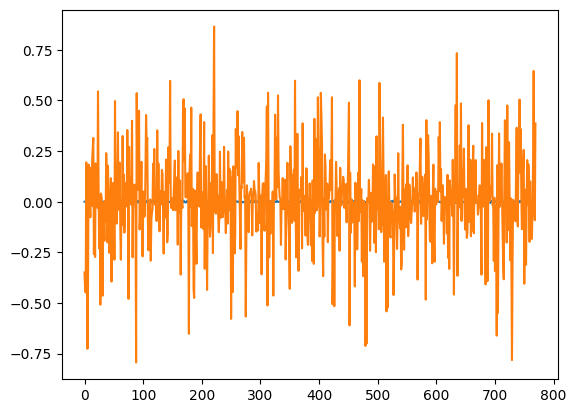

In [11]:
plt.plot(roots_list.mean(axis=0))
plt.plot(pstore)

In [12]:
model.trees[0]

array([<spyct.node.Node object at 0x17b7d2230>,
       <spyct.node.Node object at 0x17f9b0be0>], dtype=object)

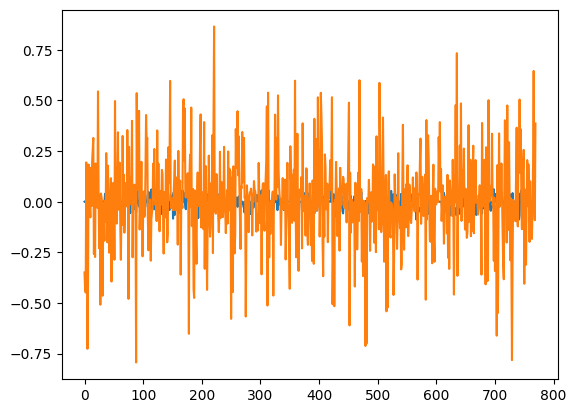

In [13]:
plt.plot(model.trees[0][0].split_weights.to_ndarray()[0])
plt.plot(pstore)

In [14]:
pstore.shape, model.trees[0][0].split_weights.to_ndarray().shape

(torch.Size([770]), (1, 769))

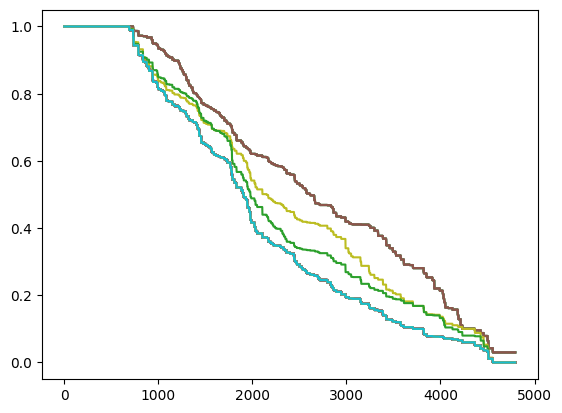

In [15]:
for i in range(80):
  plt.plot(preds_spyct[i])

In [16]:
bs = IPCWBrier(T_test, E_test)

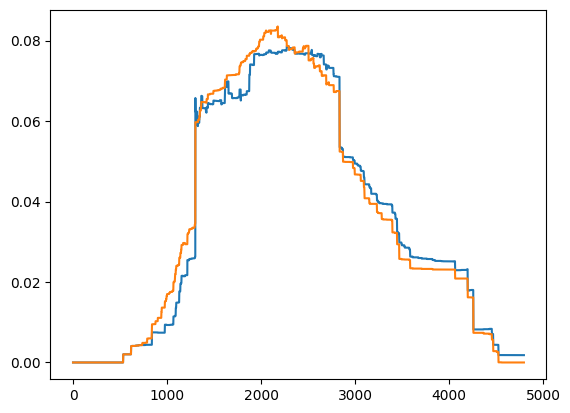

In [17]:
plt.plot(bs.evaluate(y_test, avg_preds))
plt.plot(bs.evaluate(y_test, preds_spyct))

### Interpretability

- Interpret each prediction independently
- Take the path of each sample and calculate distribution of the taken paths
- 

In [15]:
non_leaves = []

def traverse(node):
  if node is not None:
    if node.left is not None or node.right is not None: non_leaves.append(node)
    traverse(node.left)
    traverse(node.right)

traverse(model.root_node)

In [16]:
weights = [node.split_model.weight.numpy() for node in non_leaves]
weights

[array([[-7.68373072e-01, -9.31114554e-01,  7.63386369e-01,
          1.06100392e+00, -4.17283833e-01, -8.99758101e-01,
         -5.48363864e-01, -6.02521420e-01,  2.77935147e-01,
         -6.44819438e-01, -1.17926288e+00, -7.57653773e-01,
         -1.31712711e+00, -9.88086402e-01,  1.20913160e+00,
          1.05346002e-01, -1.01527169e-01,  7.23659754e-01,
          1.28156900e+00, -2.25495175e-01,  4.28838953e-02,
         -1.28054905e+00,  8.46570671e-01,  3.71858031e-01,
          3.99812013e-01,  4.87635016e-01, -1.97532803e-01,
          7.41825402e-01, -7.44453907e-01, -2.03669354e-01,
         -1.78794944e+00,  9.67317402e-01, -5.16612947e-01,
         -9.83200073e-01, -8.44015062e-01, -4.80330765e-01,
          3.45482439e-01,  3.11550140e-01, -2.44919345e-01,
          9.46991622e-01, -4.51710104e-04, -1.77980161e+00,
         -5.42652011e-01, -5.93819499e-01,  5.74084222e-01,
         -7.50122070e-01, -3.60674322e-01,  2.78339684e-01,
          1.82772219e+00,  3.71657498e-0

In [17]:
weights = np.array(weights)

In [18]:
weights = weights.reshape(weights.shape[0], -1)

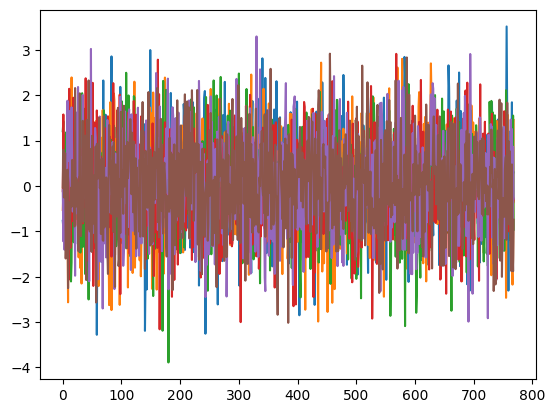

In [19]:
for i in range(weights.shape[0]):
  plt.plot(weights[i])

In [20]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

data_normalized = scaler.fit_transform(weights.T).T

In [21]:
filtered_values_per_column = [data_normalized[i, :][data_normalized[i, :] > 0.9] for i in range(data_normalized.shape[0])]

In [22]:
data_normalized.shape

(6, 769)

In [23]:
for node in non_leaves:
  print(node.num_instances)

334
245
155
90
89
59


In [24]:
non_leaves[0].num_instances/model.num_training_instances*(data_normalized[0, :]/np.linalg.norm(data_normalized[0, :]))

array([0.02643487, 0.02472167, 0.04255979, 0.04569283, 0.0301308 ,
       0.02505177, 0.02875092, 0.02818079, 0.03744941, 0.02773552,
       0.02210941, 0.02654771, 0.0206581 , 0.02412193, 0.04725217,
       0.03563256, 0.03345479, 0.04214158, 0.04801473, 0.03214977,
       0.03497501, 0.02104316, 0.04343548, 0.03843815, 0.03873242,
       0.03965694, 0.03244413, 0.04233281, 0.02668666, 0.03237953,
       0.01570172, 0.04470658, 0.02908516, 0.02417337, 0.02563858,
       0.0294671 , 0.03816049, 0.03780328, 0.03194529, 0.04449261,
       0.03451882, 0.0157875 , 0.02881104, 0.0282724 , 0.04056699,
       0.02662699, 0.03072673, 0.03745367, 0.05376411, 0.03491482,
       0.03025232, 0.0342459 , 0.02443608, 0.03491497, 0.02234661,
       0.03106368, 0.04526774, 0.04155849, 0.        , 0.02596689,
       0.02961288, 0.02400807, 0.03854871, 0.03927328, 0.02610736,
       0.02473207, 0.0169287 , 0.0211952 , 0.02755124, 0.05898166,
       0.02478036, 0.0283148 , 0.03144334, 0.05102547, 0.03293

In [25]:
importances = torch.zeros((data_normalized.shape[1]))
for i, node in enumerate(non_leaves):
  importances += node.num_instances/model.num_training_instances*(data_normalized[i, :]/np.linalg.norm(data_normalized[i, :]))

In [26]:
torch.topk(importances, k=10)

torch.return_types.topk(
values=tensor([0.1409, 0.1390, 0.1389, 0.1387, 0.1380, 0.1376, 0.1352, 0.1344, 0.1343,
        0.1342]),
indices=tensor([556, 627, 276, 572, 658, 671,  48, 756, 342, 462]))

In [30]:
dict(zip(X_train.columns[torch.topk(importances, k=10).indices.tolist()].tolist(), torch.topk(importances, k=10).values.tolist()))

{'platelet_141': 0.14091509580612183,
 'platelet_242': 0.13900962471961975,
 'copper_71': 0.13887152075767517,
 'platelet_166': 0.13873301446437836,
 'platelet_281': 0.13799962401390076,
 'platelet_298': 0.13761702179908752,
 'chol_222': 0.13518749177455902,
 'platelet_475': 0.13435257971286774,
 'copper_199': 0.1342909336090088,
 'trig_143': 0.1341859996318817}

# After implementation

In [9]:
model.feature_importances(k=10)

ValueError: cannot reshape array of size 0 into shape (0,newaxis)

In [13]:
model.feature_importances()

tensor([0.1017, 0.1387, 0.1208, 0.0893, 0.1068, 0.1069, 0.0927, 0.1229, 0.0943,
        0.0733, 0.1183, 0.0772, 0.0972, 0.0830, 0.0855, 0.0932, 0.1231, 0.1026,
        0.1223, 0.1092, 0.1104, 0.0810, 0.0929, 0.0958, 0.1066, 0.0847, 0.0809,
        0.0702, 0.1255, 0.0920, 0.1094, 0.1140, 0.1077, 0.0937, 0.1113, 0.0963,
        0.0802, 0.0948, 0.0825, 0.1045, 0.1040, 0.0737, 0.1042, 0.1204, 0.0923,
        0.1000, 0.0828, 0.0981, 0.0965, 0.0996, 0.0851, 0.1046, 0.1215, 0.0892,
        0.1000, 0.0789, 0.1043, 0.1125, 0.1180, 0.0991, 0.1111, 0.1106, 0.1082,
        0.1000, 0.1132, 0.0961, 0.1112, 0.0803, 0.1106, 0.0829, 0.1056, 0.0864,
        0.0734, 0.1031, 0.1134, 0.0864, 0.0823, 0.0904, 0.0946, 0.1326, 0.0822,
        0.0928, 0.0900, 0.1078, 0.1022, 0.1089, 0.1081, 0.1001, 0.1319, 0.0909,
        0.1031, 0.1018, 0.1085, 0.1122, 0.1064, 0.1187, 0.1188, 0.0992, 0.0958,
        0.1066, 0.1211, 0.1161, 0.0850, 0.1182, 0.1020, 0.1085, 0.1048, 0.1091,
        0.1165, 0.1120, 0.1050, 0.1207, 

In [67]:
feature_importances(model, k=20)

{103: 0.13976873457431793,
 191: 0.1384929120540619,
 46: 0.1376630961894989,
 327: 0.13457389175891876,
 706: 0.1341658979654312,
 506: 0.1338818371295929,
 566: 0.13257694244384766,
 299: 0.13046687841415405,
 428: 0.1292688548564911,
 341: 0.1291639357805252,
 664: 0.12835951149463654,
 260: 0.12761543691158295,
 457: 0.12722422182559967,
 643: 0.12637358903884888,
 122: 0.1263273060321808,
 346: 0.12624722719192505,
 149: 0.12590552866458893,
 153: 0.1256956309080124,
 499: 0.1252218782901764,
 56: 0.12486760318279266}